# Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [4]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1]) 

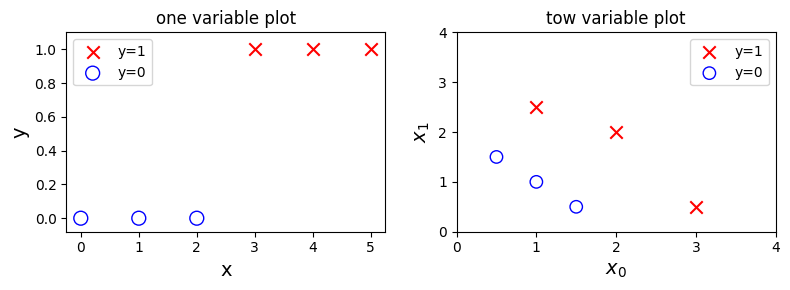

In [5]:
pos = y_train==1
neg = y_train==0

fig, ax = plt.subplots(1,2,figsize=(8,3))

ax[0].scatter(x_train[pos],y_train[pos], marker='x', color='red', label='y=1', s=80)
ax[0].scatter(x_train[neg],y_train[neg],marker='o',label='y=0',s=100, edgecolors='blue', facecolors='None')
ax[0].set_ylim(-0.08,1.1)
ax[0].set_xlabel('x', fontsize=14)
ax[0].set_ylabel('y', fontsize=14)
ax[0].set_title('one variable plot')
ax[0].legend()

ax[1].scatter(X_train2[y_train2==1,0],X_train2[y_train2==1,1], marker='x', color='red', label='y=1', s=80)
ax[1].scatter(X_train2[y_train2==0,0],X_train2[y_train2==0,1], marker='o', label='y=0', s=80,
              facecolors='None',edgecolors='blue')
ax[1].axis([0, 4, 0, 4])
ax[1].set_xlabel('$x_0$', fontsize=14)
ax[1].set_ylabel('$x_1$', fontsize=14)
ax[1].set_title('tow variable plot')
ax[1].legend()

plt.tight_layout()
plt.show()

## 1- Sigmoid or Logistic Function
for a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1.

### Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$$\begin{align*} g(z) = \frac{1}{1+e^{-z}}\tag{1}\end{align*}$$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.

In [6]:
def sigmoid(z):
    g = 1 / (1 + (np.exp(-z)))
    return g

In [7]:
# TEST
z_tmp = np.arange(-10,11)

g = sigmoid(z_tmp)

print("output: ")
print(np.c_[z_tmp, g])

output: 
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


**Important Note:** As you can see all output value between 0 and 1

### Refresher on logistic regression and decision boundary

* Recall that for logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$
  
  
* Let's plot the sigmoid function to see where $g(z) >= 0.5$

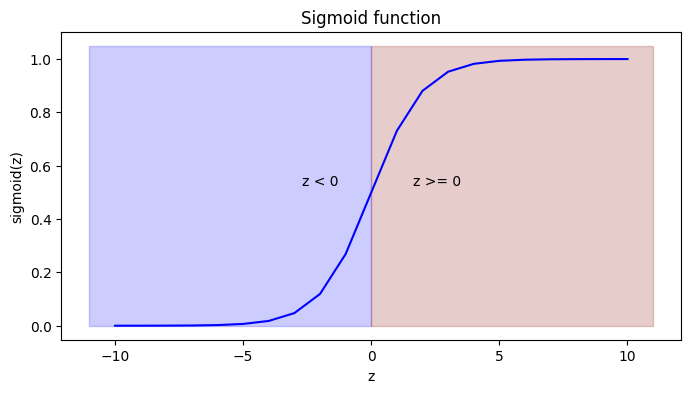

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(z_tmp, sigmoid(z_tmp), c='b')
ax.set_title("Sigmoid function")
ax.set_xlabel('z')
ax.set_ylabel('sigmoid(z)')

ylim=ax.get_ylim()
xlim=ax.get_xlim()

ax.fill_between([xlim[0], 0], [ylim[1], ylim[1]], alpha=0.2, color='blue')
ax.fill_between([0, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color='darkred')
ax.annotate("z >= 0", xy= [0,0.5], xycoords='data',
                xytext=[30,5],textcoords='offset points')
ax.annotate("z < 0", xy= [0,0.5], xycoords='data',
                xytext=[-50,5],textcoords='offset points', ha='left')
plt.show()

* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$
  
  
  
## 2- Plotting decision boundary

* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$. That is,

  $f(x) = g(x_0+x_1-3)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.


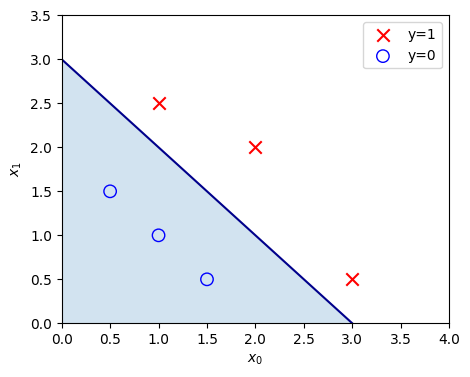

In [9]:
x0 = np.arange(0,6)
x1 = 3 - x0

fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1,c='darkblue')
ax.axis([0, 4, 0, 3.5])
ax.fill_between(x0,x1, alpha=0.2)

ax.scatter(X_train2[y_train2==1,0],X_train2[y_train2==1,1], marker='x', color='red', label='y=1', s=80)
ax.scatter(X_train2[y_train2==0,0],X_train2[y_train2==0,1], marker='o', label='y=0', s=80,
              facecolors='None',edgecolors='blue')
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.legend()
plt.show()

* In the plot above, the blue line represents the line $x_0 + x_1 - 3 = 0$ and it should intersect the x1 axis at 3 (if we set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if we set $x_1$ = 0, $x_0$ = 3). 


* The shaded region represents $-3 + x_0+x_1 < 0$. The region above the line is $-3 + x_0+x_1 > 0$.


* Any point in the shaded region (under the line) is classified as $y=0$.  Any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".

## 3- Cost function

For logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.

In [13]:
def compute_cost_logistic(X, y, w, b):
    m,n = X.shape
    cost = 0
    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost/m
    return cost

In [15]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train2, y_train2, w_tmp, b_tmp))

0.36686678640551745


#### Example
Now, let's see what the cost function output is for a different value of $w$. 

* In a previous example, we plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `b = -3, w = np.array([1,1])`.

* Let's say you want to see if $b = -4, w_0 = 1, w_1 = 1$, or `b = -4, w = np.array([1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

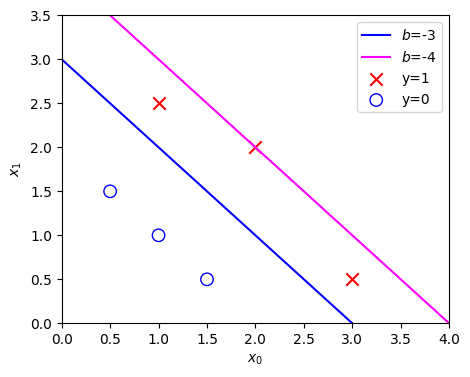

In [17]:
x0 = np.arange(0,6)
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1, c="blue", label="$b$=-3")
ax.plot(x0,x1_other, c="magenta", label="$b$=-4")
ax.axis([0, 4, 0, 3.5])

ax.scatter(X_train2[y_train2==1,0],X_train2[y_train2==1,1], marker='x', color='red', label='y=1', s=80)
ax.scatter(X_train2[y_train2==0,0],X_train2[y_train2==0,1], marker='o', label='y=0', s=80,
              facecolors='None',edgecolors='blue')
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.legend()
plt.show()

You can see from this plot that `b = -4, w = np.array([1,1])` is a worse model for the training data. Let's see if the cost function implementation reflects this.

In [20]:
w_tmp = np.array([1,1])
b_tmp1 = -3
b_tmp2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train2, y_train2, w_tmp, b_tmp1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train2, y_train2, w_tmp, b_tmp2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`

## 4- Gradient Descent For Logistic Regression

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


In [31]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (err_i * X[i,j])
        dj_db = dj_db + err_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [34]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


#### Gradient Descent Code 
The code implementing equation (1) above is implemented below.

In [40]:
import copy, math

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X_train2, y_train2, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<10000:
            J_history.append(compute_cost_logistic(X, y, w, b))

        if i % math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

In [41]:
w_tmp  = np.zeros_like(X_train2[0])
b_tmp  = 0.
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train2, y_train2, w_tmp, b_tmp, alpha, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.281 5.078], b:-14.222409982019837
